<a href="https://colab.research.google.com/github/frankguo77/Python-Data-Analysis/blob/main/AAAMLP/chapter3_Cross_Validation/1_Overfitting_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
from sklearn import datasets

In [2]:
#Import matplotlib and seaborn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#This is our global size of label text
#On the plots
matplotlib.rc("xtick",labelsize = 20)
matplotlib.rc("ytick",labelsize = 20)

In [4]:
# Step 1: 用 wget 从 GitHub 下载文件
!wget https://raw.githubusercontent.com/frankguo77/Python-Data-Analysis/main/AAAMLP/chapter3_Cross_Validation/data/winequality-red.csv -O winequality-red.csv

--2025-12-09 01:18:03--  https://raw.githubusercontent.com/frankguo77/Python-Data-Analysis/main/AAAMLP/chapter3_Cross_Validation/data/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.05s   

2025-12-09 01:18:03 (1.71 MB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [5]:
import pandas as pd
df = pd.read_csv("winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# #a mapping dictionary that maps the quality values from0 to 5
# quality_mapping = {
#     3:0,
#     4:1,
#     5:2,
#     6:3,
#     7:4,
#     8:5
# }

# #You can use the map function of pandas with
# #any directory to convert the values in a given
# #column to values in the directory
# df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [7]:
df["quality"] = df["quality"] - 3

In [8]:
#use sample with frac=1 to shuffle the dataframe
#we reset the indices since they change after
#shuffling the dataframe
df = df.sample(frac = 1).reset_index(drop = True)

#Top 1000 rows are selected for training
df_train  = df.head(1000)

#bottom 599 values are selected for testing/validation
df_test = df.tail(599)

In [9]:
def accuracy_cal(df_train, df_test, depth):
  clf = tree.DecisionTreeClassifier(max_depth= depth)
  cols = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
  ]

  clf.fit(df_train[cols], df_train.quality)

  train_preds = clf.predict(df_train[cols])
  test_preds = clf.predict(df_test[cols])

  train_acc = metrics.accuracy_score(df_train.quality, train_preds)
  test_acc = metrics.accuracy_score(df_test.quality, test_preds)
  return train_acc,test_acc

In [10]:
def display(train_acc, test_acc):
  plt.figure(figsize=(10, 5))
  sns.set_style("whitegrid")
  plt.plot(train_acc, label="train accuracy")
  plt.plot(test_acc, label="test accuracy")
  plt.legend(loc="upper left", prop={"size": 15})
  plt.xticks(range(0,26, 5))
  plt.xlabel("max depth", size=2)
  plt.ylabel("accuracy", size=20)
  plt.show()

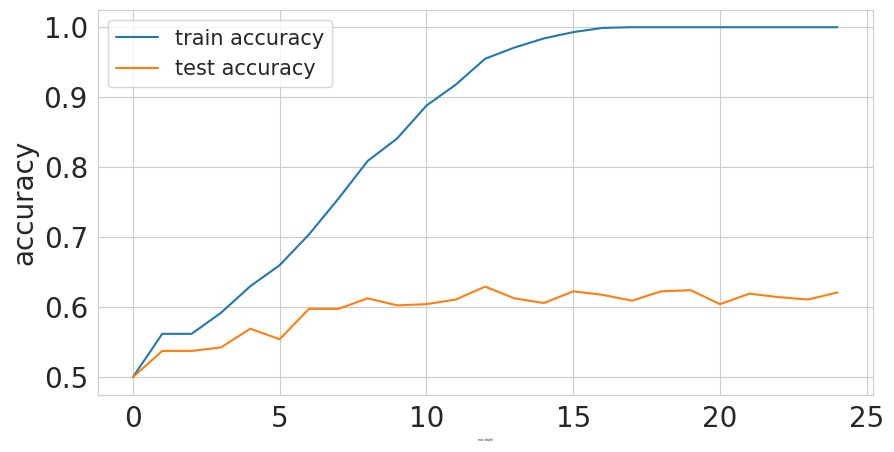

In [11]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
  train_accuracy,test_accuracy = accuracy_cal(df_train,df_test,depth)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

display(train_accuracies, test_accuracies)

## K-fold Cross Validation

In [17]:
from sklearn import model_selection

df = (df
    .assign(kfold = 1)
    .sample(frac=1)
    .reset_index(drop=True))

kf = model_selection.KFold(n_splits = 5)

for fold, (trn ,val) in enumerate(kf.split(X=df)):
  df.loc[val, "kfold"] = fold

df.to_csv("train_folds.csv", index=False)

In [18]:
k_fold_df  = pd.read_csv("train_folds.csv")
k_fold_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.8,0.51,0.19,3.2,0.081,8.0,30.0,0.99840,3.23,0.58,10.5,3,0
1,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,5,0
2,8.0,0.31,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5,4,0
3,9.0,0.46,0.23,2.8,0.092,28.0,104.0,0.99830,3.10,0.56,9.2,2,0
4,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,3,0


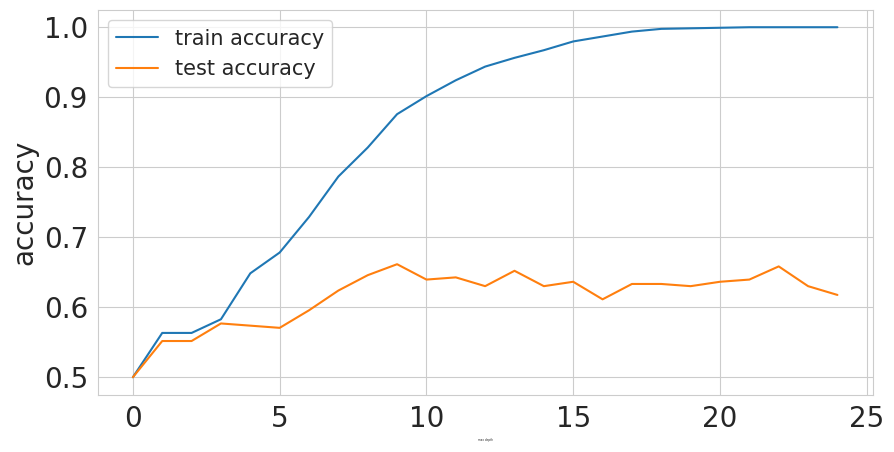

In [19]:
import numpy as np

train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
  for i in range(5):
    train_sum, test_sum = [], []
    df_train = k_fold_df[k_fold_df['kfold'] != i]
    df_test = k_fold_df[k_fold_df['kfold'] == i]
    train_accuracy,test_accuracy = accuracy_cal(df_train,df_test,depth)
    train_sum.append(train_accuracy)
    test_sum.append(test_accuracy)
  train_accuracies.append(np.mean(train_sum))
  test_accuracies.append(np.mean(test_sum))

display(train_accuracies, test_accuracies)

Text(0.5, 0, 'count')

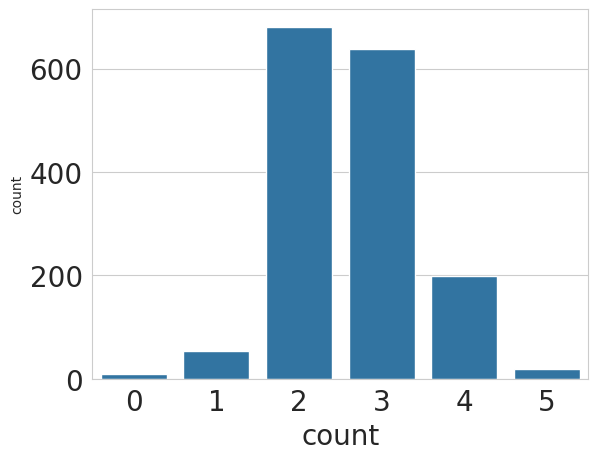

In [20]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_xlabel('count', fontsize=20)

This figure shows that the quality of the wine is very much skewed. Some class have much more samples then others. So the simple Kfold doesn't lead to the equal distribution of the tragets in every fold.So strtified K-flod helps.

## Stratified k-fold

In [45]:
skf = model_selection.StratifiedKFold(n_splits = 5)

df["kfold"] = -1
for fold, (trn ,val) in enumerate(skf.split(X=df, y=df.quality)):
  df.loc[val, "kfold"] = fold

df.to_csv("train_sfolds.csv", index=False)

In [46]:
sk_fold_df  = pd.read_csv("./train_sfolds.csv")

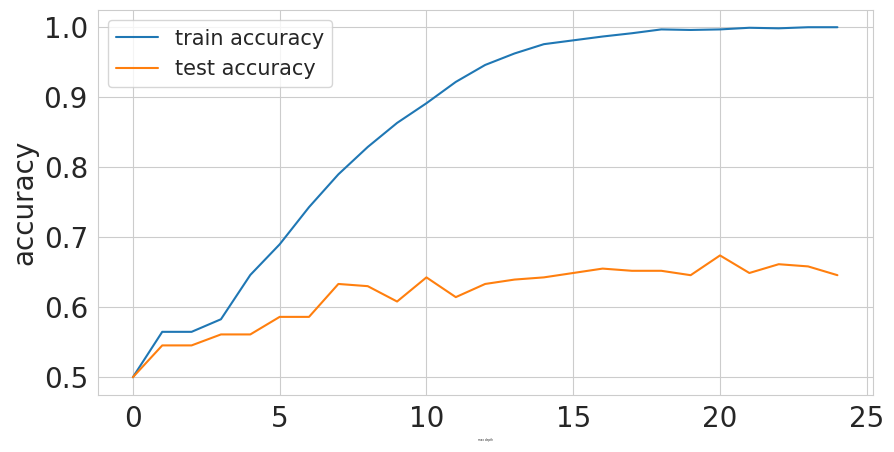

In [47]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    for i in range(5):
        train_sum = []
        test_sum = []

        df_test = sk_fold_df[sk_fold_df["kfold"] == i]
        df_train = sk_fold_df[sk_fold_df["kfold"] != i]

        train_accuracy,test_accuracy = accuracy_cal(df_train,df_test,depth)
        train_sum.append(train_accuracy)
        test_sum.append(test_accuracy)


    train_accuracies.append(np.mean(train_sum))
    test_accuracies.append(np.mean(test_sum))


display(train_accuracies, test_accuracies)


## Cross validation for Regression



-   We can use simple kfold for regression directily
-   Mostly simple k-fold cross-validation works for any regression problem. However, if you see that the distribution of targets is not consistent, you can use stratified k-fold.
- To use stratified k-fold for regression problem, we have to first divide the target into bins , and then we can use stratified k-fold in the same way as classification.

- Ways of choosing number of bins:
  - if you have large number of samples(>10k,>100k) then you don't nedd to care about number of bins. Just divide the data into 10 to 20 bins.
  - But if you don't have a lot of samples, you can use a simple rule like **Sturge's Rule** to calulate the appropriate number of bins.
  **Sturge's Rule: Number of bins = 1 + log2(N)
  where N = total number of samples**  
  
  






In [48]:
## create a random regression dataset
X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

## creating a dataframe
df = pd.DataFrame(X, columns=[f'f_{i}' for i in range(X.shape[1])])

df = (df
    .assign(target = y)
    .sample(frac=1)
    .reset_index(drop=True)
    )
num_bins = int(np.log(1 + df.shape[0]))

df['bins'] = pd.cut(x=df['target'], bins=num_bins, labels=False)


Text(0, 0.5, 'count')

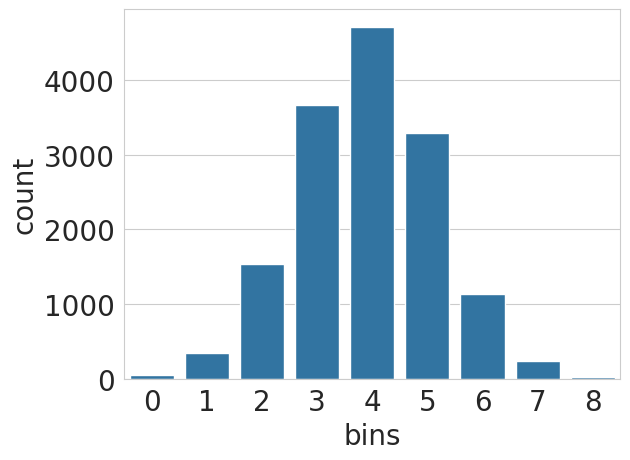

In [49]:
b = sns.countplot(x='bins', data=df)
b.set_xlabel("bins",fontsize = 20)
b.set_ylabel("count",fontsize = 20)

**The figure show that the data is very much skewed. Some classes have lot of sample but other don't have that many. If we do simple k-fold, we won't have an equal distribution of the targets in every fold. Thus, we chooose stratified k-fold in this case.**

In [50]:
## create a new column for storing fold number and fill it with -1
df['kfold'] = -1

## To randomzie row of data
df = df.sample(frac=1).reset_index(drop=True)


## initiate stratified kfold class from model_selection
kf = model_selection.StratifiedKFold(n_splits=4, shuffle=False)

## filling the fold values, Note: instead of target values we use bin values
for fold, (train_idx, valid_idx) in enumerate(kf.split(X=df, y=df['bins'].values)):
    df.loc[valid_idx, 'kfold'] = fold


## drop the bins column
df.drop('bins', axis=1, inplace=True)

In [51]:
#Final data is
df.head(10)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-0.583033,-0.201507,1.593195,-1.498535,0.581383,-0.106404,0.273045,1.842505,0.179638,0.128642,...,-1.302132,1.559027,1.645377,0.516396,-0.784686,0.310382,-0.044393,1.493577,-193.860469,0
1,-2.270074,0.274357,-0.822040,-0.757344,1.163469,-1.004068,1.505309,-0.824309,-0.641287,-0.114054,...,0.279610,1.350156,-1.566466,0.231284,-1.315888,-1.508812,0.127263,0.148232,-285.918683,0
2,1.769874,-0.454083,-0.959216,1.236887,-0.305344,0.291976,-0.282737,1.489806,0.349016,-0.524046,...,-2.542487,-1.143170,0.811513,-0.460539,-1.082058,0.186124,1.281181,-0.572782,15.607940,0
3,0.744171,0.622401,0.405253,1.134445,-0.727951,0.268156,-0.894391,0.895565,0.481705,-0.415297,...,0.409241,-0.762751,1.162373,-1.179986,0.223294,2.191292,1.150740,-1.772617,139.655202,0
4,0.600048,0.874155,0.015297,-1.505337,-0.780153,-0.017293,0.503642,1.211797,0.585309,-0.387819,...,0.209654,1.298583,1.229285,-0.431128,-0.821108,0.585115,-2.254253,-0.487923,-54.969603,0
5,0.277250,-0.336796,-0.393048,1.961484,-0.210030,-0.598276,0.241890,-2.256812,-0.470169,1.095710,...,0.717768,-0.606561,-0.350073,1.081601,0.587501,-0.656139,0.346263,0.966851,-115.909191,0
6,-0.601546,-0.564009,-0.876526,-0.799180,0.909487,-0.736887,-0.683441,0.510098,-0.627409,-0.167926,...,-0.653926,1.960293,0.175271,1.066975,-1.949096,-1.381334,0.618316,-1.546595,-195.179387,0
7,0.159555,0.266936,-0.962086,0.356808,-0.588625,1.796510,-0.396768,0.375264,-0.059154,1.158494,...,-0.741262,1.481433,0.010806,-0.627925,-0.131049,0.690293,0.492373,0.989234,221.479245,0
8,-0.085091,-1.649216,-0.631279,0.031728,0.002675,2.003297,1.690311,0.825755,-2.186318,-1.078867,...,0.807797,-0.353595,-0.645262,-0.621292,-0.784536,-0.002044,0.852753,-0.473861,-205.610179,0
9,-0.141887,-1.164593,-0.288032,0.907585,2.047354,0.746554,1.197655,-0.169033,-1.260681,1.870136,...,1.284798,1.163538,-0.262767,0.171435,-0.136830,-1.609113,0.098888,0.671992,9.174901,0
